In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"D:\projects\Supervised Machine Learning\Customer Churn Prediction Using Classfication\customer churn.csv")
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [27]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
df[df.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [29]:
df.describe(include="O").T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [30]:
df.duplicated().sum()

np.int64(0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
numerical_features=df.select_dtypes(exclude="object").columns
categorical_features=df.select_dtypes(include="object").columns
print("We have total {} features in the dataset :{}\n".format(len(df.columns),df.columns))
print("We have {} numerical columns in the dataset :{}\n".format(len(numerical_features),numerical_features))
print("We have {} categorical features in the dataset : {}".format(len(categorical_features),categorical_features))

We have total 21 features in the dataset :Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We have 3 numerical columns in the dataset :Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

We have 18 categorical features in the dataset : Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


<Axes: ylabel='count'>

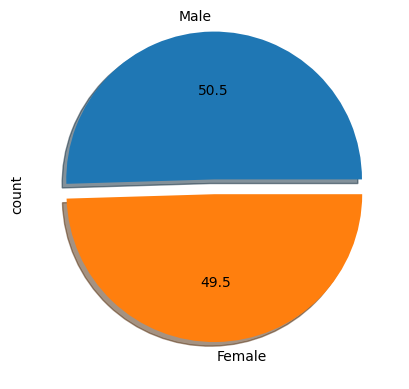

In [33]:
df["gender"].value_counts().plot.pie(autopct="%1.1f",shadow=True,explode=[0.1,0])

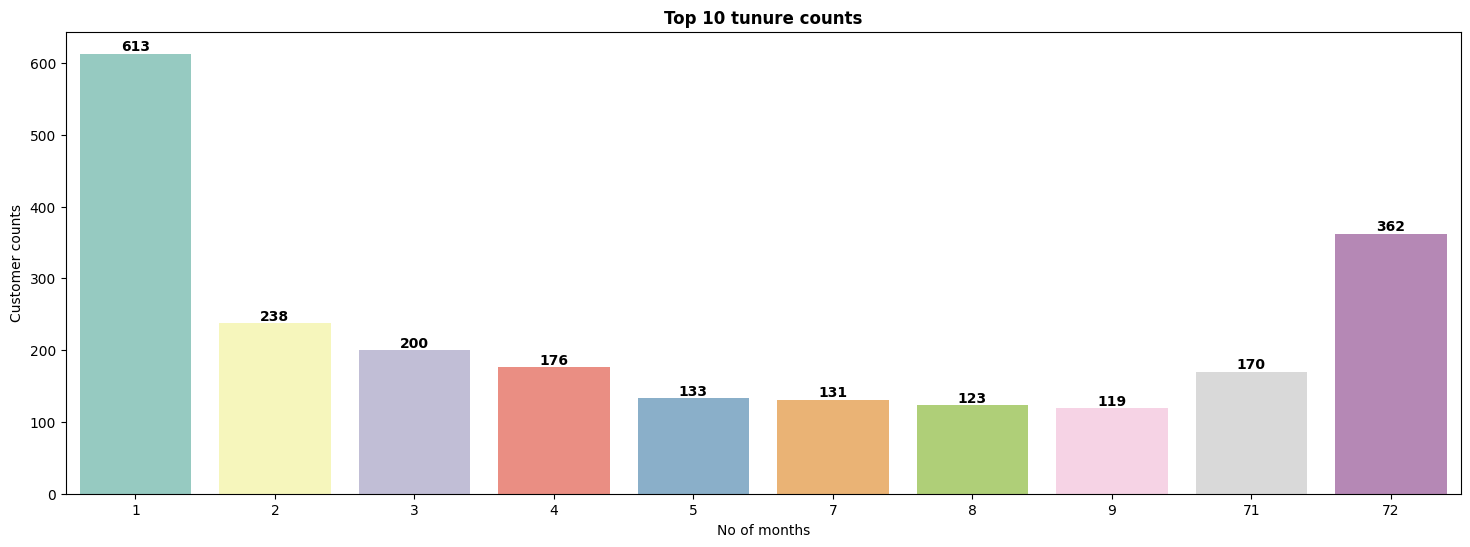

In [34]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
tenure_counts=df.tenure.value_counts().to_frame().sort_values(by="count",ascending=False).head(10)
sns.barplot(x="tenure",y="count",data=tenure_counts,palette="Set3",orient="v",ax=ax)
plt.title("Top 10 tunure counts",fontweight="bold")
plt.xlabel("No of months")
plt.ylabel("Customer counts")
for container in ax.containers:
    ax.bar_label(container,fontweight="bold",fontsize=10)

plt.show()


*Interpretation:Customers with lower tenure are more likely to churn compared to customers with longer tenure.In the above picture we have 1 month tenure customers are in higher proportion.we have to focus them.*

In [35]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

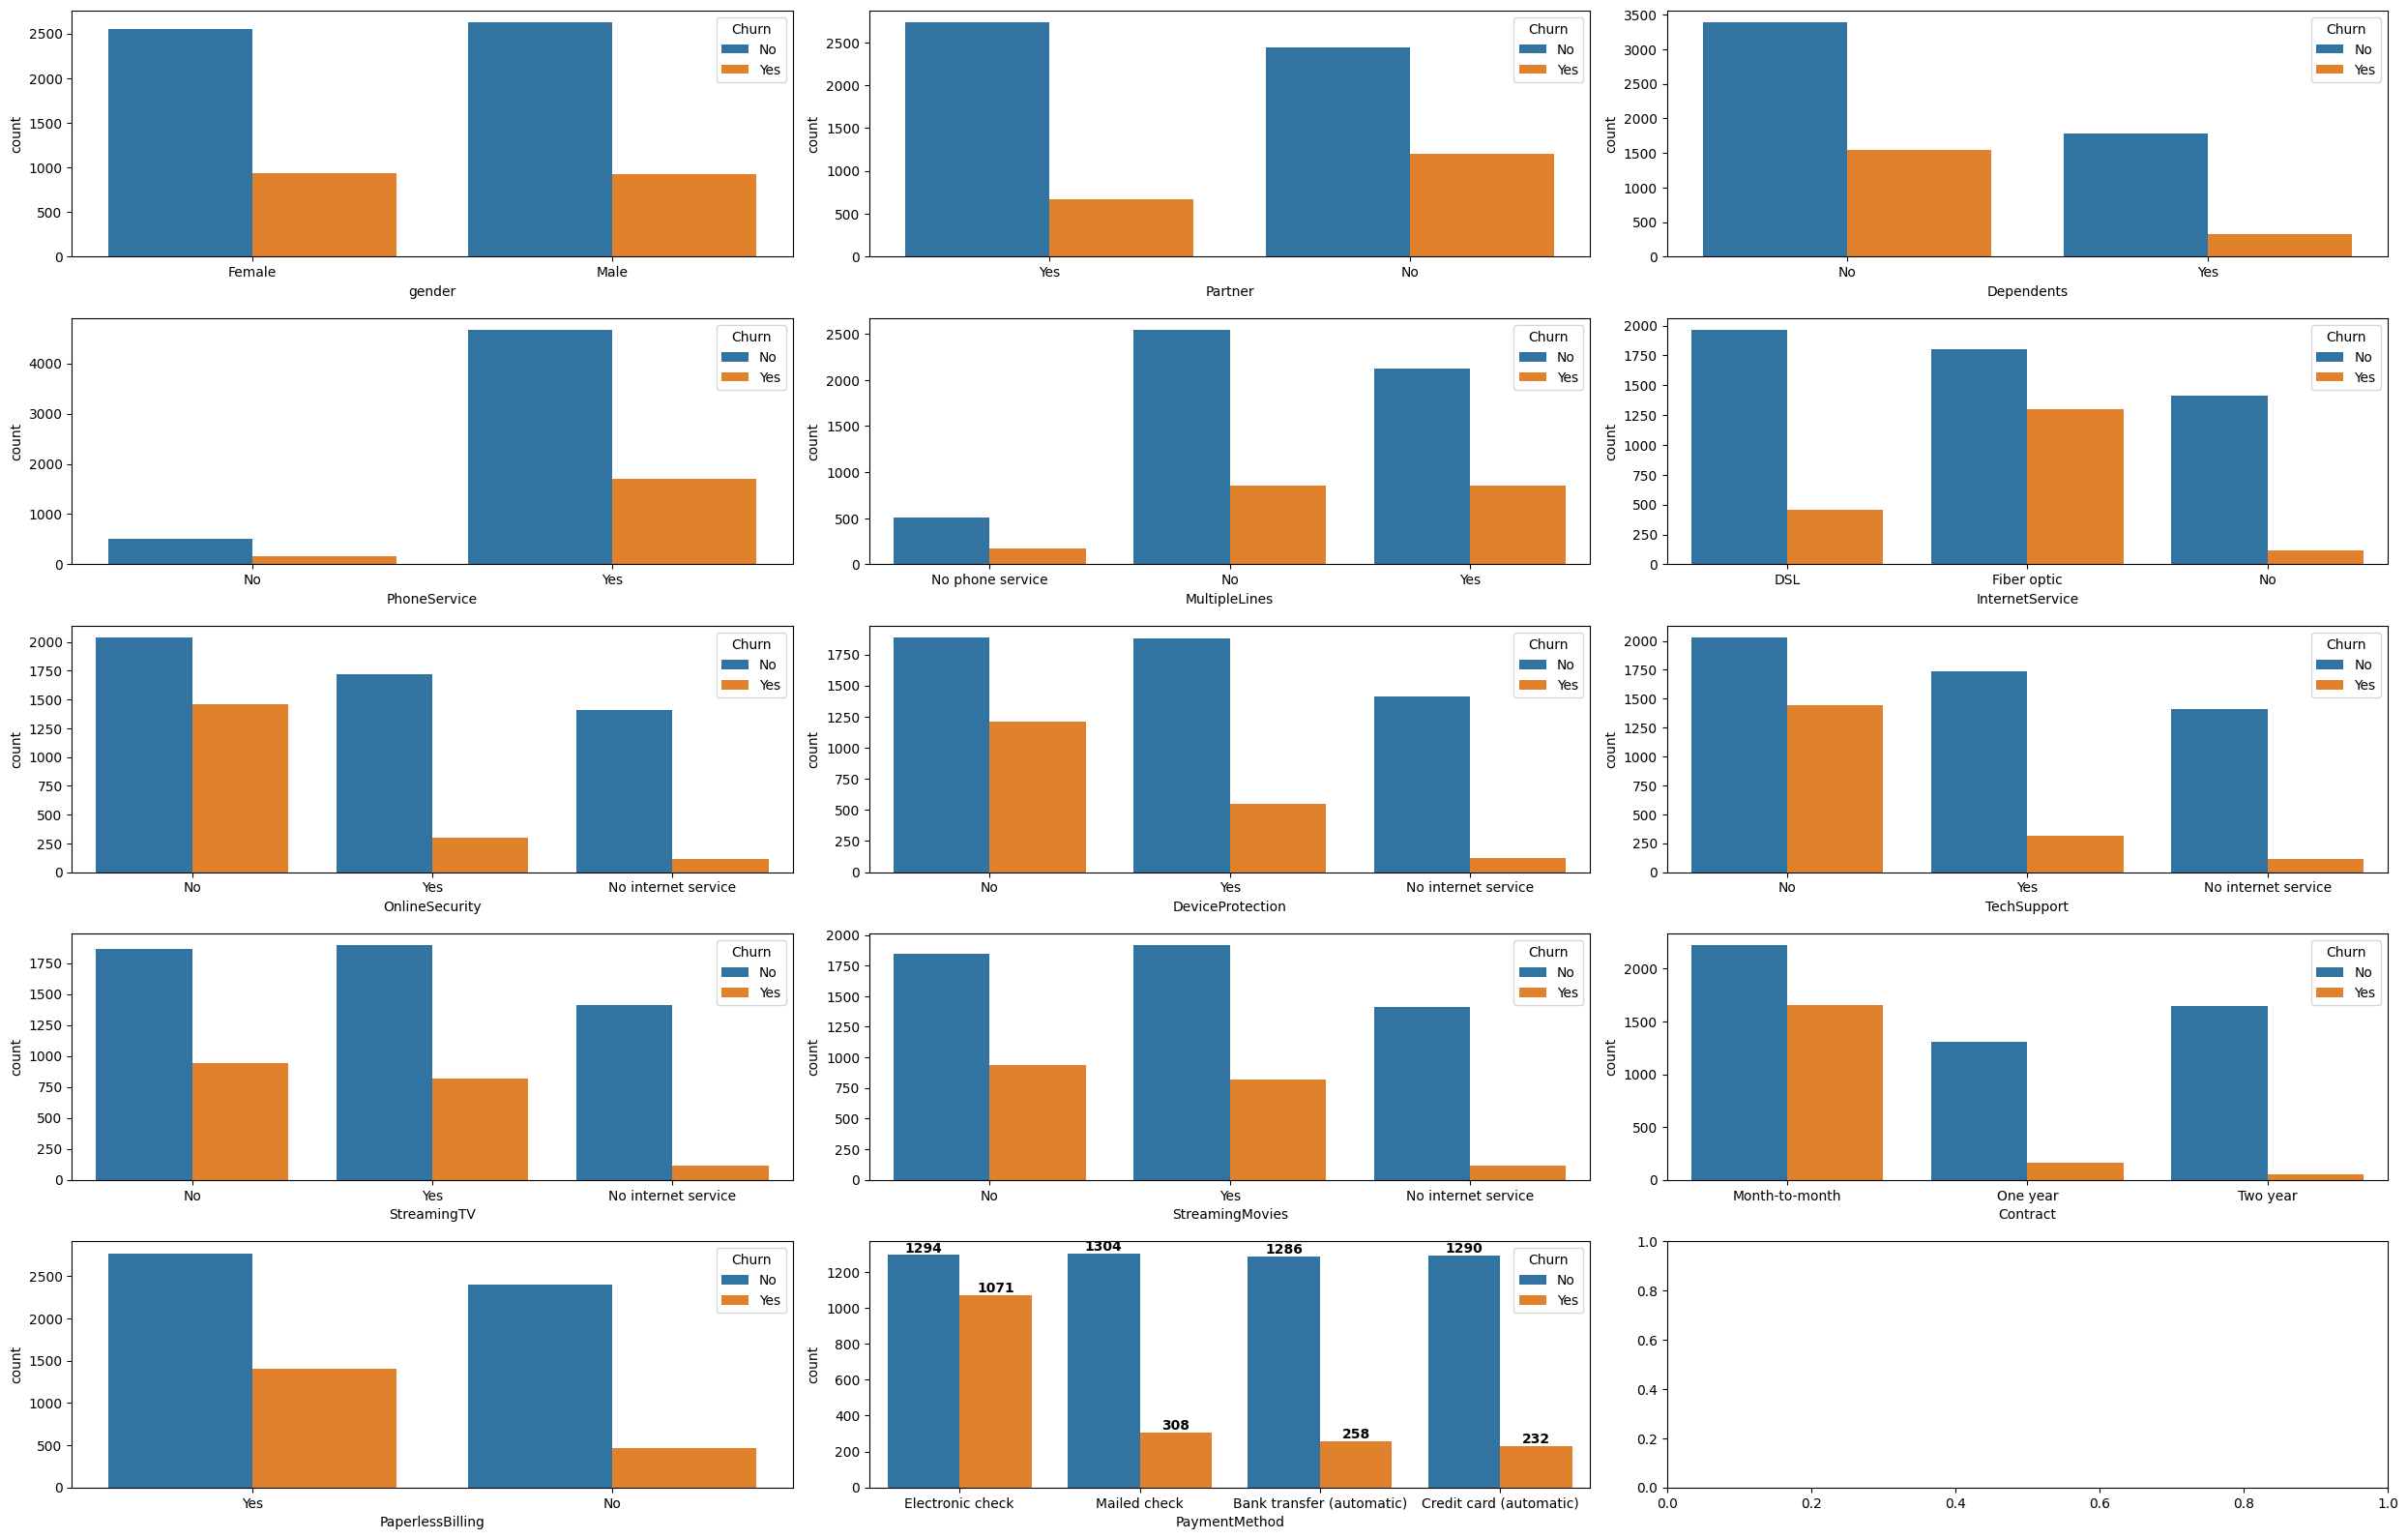

In [36]:
features=["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","DeviceProtection","TechSupport"
          ,"StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]


fig,ax=plt.subplots(5,3,figsize=(25,16))
ax=ax.ravel()
for i in range(len(features)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=features[i], hue="Churn", data=df,ax=ax[i])
for container in ax[i].containers:
    ax[i].bar_label(container,fontweight="bold",fontsize=10)

plt.tight_layout()
plt.show()


In [37]:
corr=df.corr(numeric_only=True)
corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<Axes: >

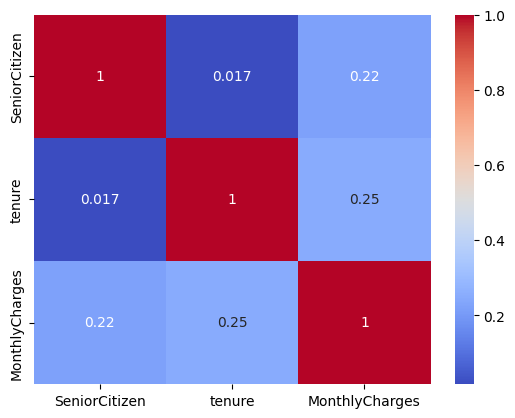

In [38]:
sns.heatmap(corr,annot=True,cmap="coolwarm")

In [39]:
df.groupby("Contract")["Churn"].value_counts(normalize=True)*100

Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.730482
                Yes      11.269518
Two year        No       97.168142
                Yes       2.831858
Name: proportion, dtype: float64

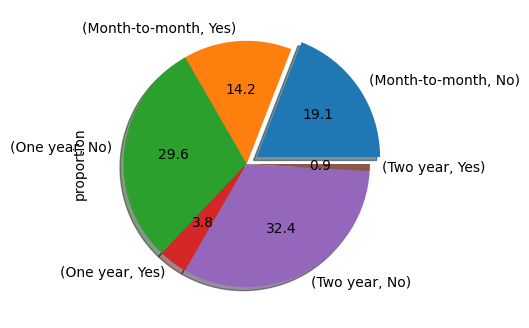

In [40]:
plt.figure(figsize=(20,4))
df.groupby("Contract")["Churn"].value_counts(normalize=True).plot.pie(autopct="%1.1f",explode=[0.1,0,0,0,0,0],shadow=True)
plt.show()


*Interpretation:Customers with long-term contracts (one-year or two-year) have significantly lower churn compared to customers on month-to-month contracts.*

In [41]:
#Droping feature which are not useful for moel traning
df.drop(columns=["customerID","gender","TotalCharges"],axis=1,inplace=True)

In [42]:
#finding features having only yes and No
yes_or_no_features=[]
for col in df.columns:
    if col=="SeniorCitizen":
        continue
    if len(df[col].unique())==2:
        yes_or_no_features.append(col)
for feature in yes_or_no_features:
    df[feature]=df[feature].map({"Yes":1,"No":0})
     

In [43]:
columns=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
for col in columns:
    print(col)
    print("--------------")
    print(df[col].unique())

OnlineSecurity
--------------
['No' 'Yes' 'No internet service']
OnlineBackup
--------------
['Yes' 'No' 'No internet service']
DeviceProtection
--------------
['No' 'Yes' 'No internet service']
TechSupport
--------------
['No' 'Yes' 'No internet service']
StreamingTV
--------------
['No' 'Yes' 'No internet service']
StreamingMovies
--------------
['No' 'Yes' 'No internet service']
Contract
--------------
['Month-to-month' 'One year' 'Two year']
PaymentMethod
--------------
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [44]:
for column in columns:
    if column=="Contract":
        df[column]=df[column].replace({"Month-to-month":0,"One year":1,"Two year":2})
    elif column=="PaymentMethod":
        df[column]=df[column].replace({"Electronic check":0,"Mailed check":1,"Bank transfer (automatic)":2,"Credit card (automatic)":3})
    else:
        df[column]=df[column].map({"Yes":0,"No":1,"No internet service":2})

In [45]:
df["MultipleLines"]=df["MultipleLines"].replace({"Yes":0,"No":1,"No phone service":2})
df["InternetService"]=df["InternetService"].replace({"Fiber optic":0,"DSL":1,"No":2})

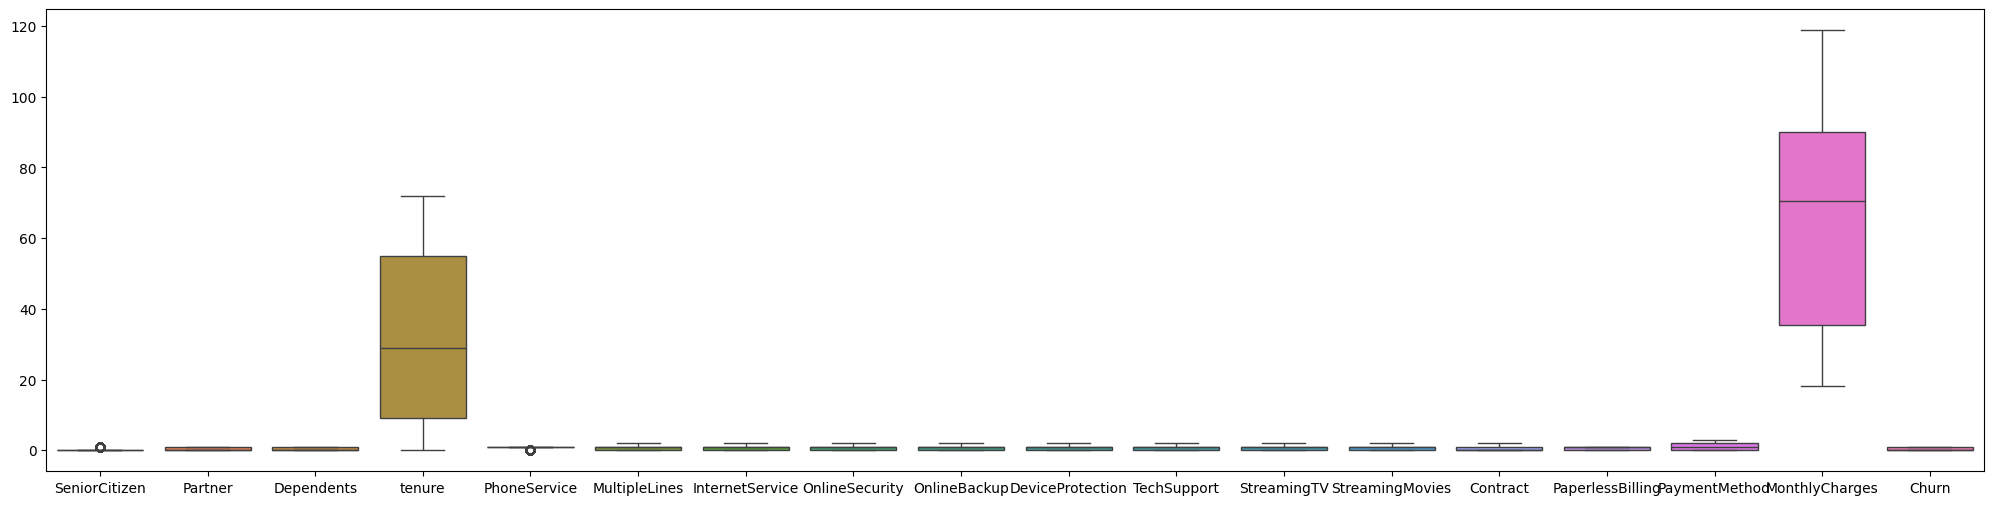

In [46]:
plt.figure(figsize=(25,6))
sns.boxplot(df)
plt.show()

In [47]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [49]:
df.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
Churn                 int64
dtype: object

In [50]:
df.to_csv("cleaned_customer_churn.csv",index=False)